Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               ConvertImageDtype()
               Lambda()
           )


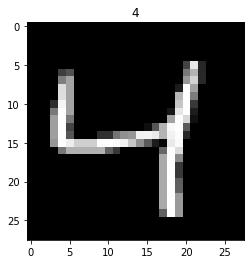

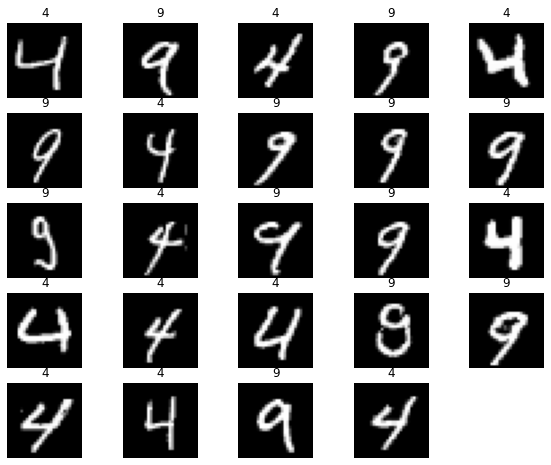

In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import numpy as np
from torch import optim
from torchvision.transforms import Lambda
from torchvision.transforms.functional import convert_image_dtype
import torchvision.transforms as transforms

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out1 = nn.Sequential(nn.Linear(32 * 7 * 7, 100),nn.ReLU())
        self.out2 = nn.Linear(100, 1)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out2(self.out1(x))
        return output, x    # return x for visualization

def test(cnn,loaders):
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            labels = ((labels - np.mean(digs))>0).float() 
            test_output, last_layer = cnn(images)
            pred_y = (test_output.squeeze()>0).float()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    print(f'Test Accuracy of the model on the {len(mask_test)} test images: %.2f' % accuracy)
    return accuracy
def get_mask_digit(digits):
    for cnt,i in enumerate(digits):
        if cnt == 0:
            s_train = train_data.targets == i
            s_test = test_data.targets == i
        else:
            s_train += train_data.targets == i
            s_test += test_data.targets == i
    return torch.squeeze(torch.nonzero(s_train)),torch.squeeze(torch.nonzero(s_test))
def set_seed():
    torch.cuda.manual_seed(0)
    torch.cuda.manual_seed_all(0)
    torch.manual_seed(0)
    np.random.seed(0)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms(True)
    torch.manual_seed(0)
set_seed()

N0 = 1000
num_times = 1
digs = [4,9]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([
        ToTensor(),
        transforms.ConvertImageDtype(torch.float32),
        Lambda(lambda x: (x.float() - torch.mean(x.float()))/torch.std(x.float()))
    ]), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([
        ToTensor(),
        transforms.ConvertImageDtype(torch.float32),
        Lambda(lambda x: (x.float() - torch.mean(x.float()))/torch.std(x.float()))
    ])
)
### select two digits for classification
mask_train, mask_test = get_mask_digit(digs)
test_data = torch.utils.data.Subset(test_data, mask_test)
#sum(train_data.targets[mask_train[:N0]] == digs[0]),sum(train_data.targets[mask_train[:N0]] == digs[1])


print(train_data)
print(test_data)

plt.imshow(train_data.data[mask_train[0]], cmap='gray')
plt.title('%i' % train_data.targets[mask_train[0]])
plt.show()
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for cnt,i in enumerate(range(1, 25)):
    sample_idx = mask_train[:N0][cnt%N0]#torch.randint(len(mask_train[:N0]), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.70 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test loss 0.69 Train loss 0.69
Test los

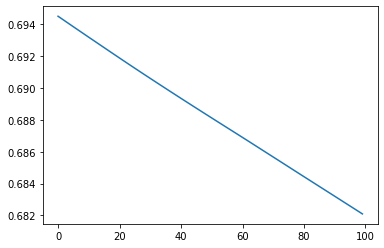

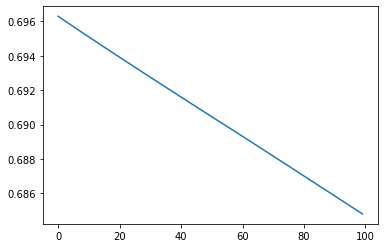

In [23]:
acc = []

mask = mask_train[:N0]

trainset1 = torch.utils.data.Subset(train_data, mask)

loaders = {
    'train' : torch.utils.data.DataLoader(trainset1, 
                                          batch_size=2000, 
                                          shuffle=False, 
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=2000, 
                                          shuffle=False, 
                                          num_workers=1),
}
set_seed()
cnn = CNN()
loss_func = nn.BCEWithLogitsLoss() 
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)   

cnn.train()
set_seed()
# Train the model
total_step = len(loaders['train'])
l = []
val_l = []
epochs = 0
for epochs in range(100):
    s = 0
    for i, (images, labels) in enumerate(loaders['train']):
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(images)   # batch x
        b_y = Variable( ((labels - np.mean(digs))>0).float() )   # batch y
        output = cnn(b_x)[0]   
        loss = loss_func(torch.squeeze(output), b_y)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()                

        s += loss.item()
        
        cnn.eval()
        with torch.no_grad():
            total = []
            for images, labels in loaders['test']:
                labels1 = ((labels - np.mean(digs))>0).float() 
                test_output, last_layer = cnn(images)
                total.append(loss_func(torch.squeeze(test_output), labels1 ) )
            val_l.append(np.mean(total))    
        print(f'Test loss %.2f' % np.mean(total), f'Train loss %.2f' % loss.item())
        cnn.train()


    l.append(s)

plt.figure()
plt.plot(l)
plt.show()
plt.figure()
plt.plot(val_l)